# K-Nearest Neighbors Algorithm (Classification)

 1) Create a K-NN model from scratch 

 2) Use sklearn to implement K-NN 
 
 3) Use sklearn to implement K-NN; use GridSearchCV and RandomizedSearchCV to select hyper-parameters
 
 4) Use sklearn to implement K-NN and mlxtend to plot the desicion boundary

## 1) Create a K-NN model from scratch 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [5]:
df = sns.load_dataset("iris")

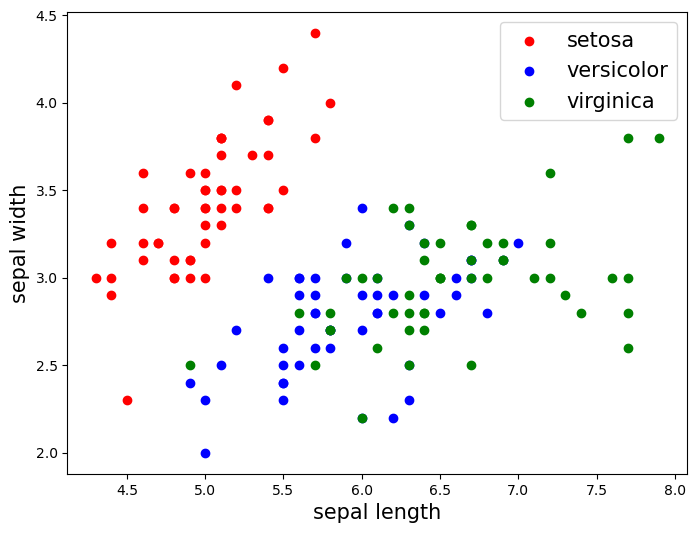

In [6]:
df1 = df[df.species=="setosa"]
df2 = df[df.species=="versicolor"]
df3 = df[df.species=="virginica"]

plt.figure(figsize = (8, 6))

plt.scatter(df1.sepal_length, df1.sepal_width, color="red", label ="setosa")
plt.scatter(df2.sepal_length, df2.sepal_width, color="blue", label="versicolor")
plt.scatter(df3.sepal_length, df3.sepal_width, color="green", label="virginica")
plt.xlabel("sepal length", fontsize=15)
plt.ylabel("sepal width", fontsize=15)
plt.legend(fontsize=15);

In [7]:
X = df[["sepal_length", "sepal_width"]].to_numpy()

y = df["species"].to_numpy()

---

**Remark**: In machine learning we fit the model to the **training data** and we choose optimal hyper-parameters using the **validation data**. Then with those choices of hyper-parameters, we fit the model again to the training data, and we evaluate and report model prformance on the **test data**. 

---

In [9]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [10]:
X_train.shape

(90, 2)

In [11]:
X_valid.shape

(30, 2)

In [12]:
X_test.shape

(30, 2)

In [13]:
# We define Euclidean distance function

def distance(p, q):
    return np.sqrt((p - q) @ (p - q))

print(f"The distance between X_train[0] and X_train[1] is {distance(X_train[0], X_train[1])}")

The distance between X_train[0] and X_train[1] is 3.026549190084311


In [14]:
# We define a function that will create a list of k nearest neighbors from the training data set to a given test point
# For each such neighbor, this list will store: features of that neighbor, its label, and its distance to the test point

def k_nearest_neighbors(point, 
                        training_features, 
                        training_labels, 
                        k):

    neighbors = []
    
    for p, l in zip(training_features, training_labels):
        d = distance(point, p)
        info = [p, l, d]
        neighbors.append(info)
        
    neighbors.sort(key = lambda x : x[-1])
    
    return neighbors[:k]

In [15]:
# Check the k_nearest_neighbors function for a test data point

k_nearest_neighbors(X_test[3], X_train, y_train, 7)

[[array([6.1, 2.9]), 'versicolor', 0.09999999999999964],
 [array([6.1, 3. ]), 'versicolor', 0.1414213562373093],
 [array([5.9, 3. ]), 'virginica', 0.1414213562373093],
 [array([6.1, 2.8]), 'versicolor', 0.1414213562373093],
 [array([5.9, 3. ]), 'versicolor', 0.1414213562373093],
 [array([6.2, 2.9]), 'versicolor', 0.20000000000000018],
 [array([5.8, 2.8]), 'virginica', 0.22360679774997916]]

In [16]:
y_test[3]

'versicolor'

In [17]:
# We write a function that makes prediction for both classification and regression

def knn_predict(point, 
                training_features, 
                training_labels, 
                k, 
                regression = False):
    
    neighbors = k_nearest_neighbors(point, 
                                    training_features, 
                                    training_labels, 
                                    k)
    
    labels = [x[1] for x in neighbors]
    
    if regression == False:
        return max(labels, key = labels.count)
    else:
        return sum(x[1] for x in labels)/k

In [18]:
labels = ['setosa', 'setosa', 'virginica', 'setosa', 'virginica']
max(labels, key = labels.count)

'setosa'

In [19]:
# Check this function

knn_predict(X_test[3], X_train, y_train, 7)

'versicolor'

In [20]:
def accuracy(test_features, 
             test_labels,
             training_features, 
             training_labels,
             k):
    
    correct = 0
    for point, label in zip(test_features, test_labels):
        correct += label == knn_predict(point, 
                                        training_features, 
                                        training_labels, 
                                        k)
    return correct/len(test_features)

In [21]:
# Check this function

accuracy(X_valid, y_valid, X_train, y_train, 15)

0.8

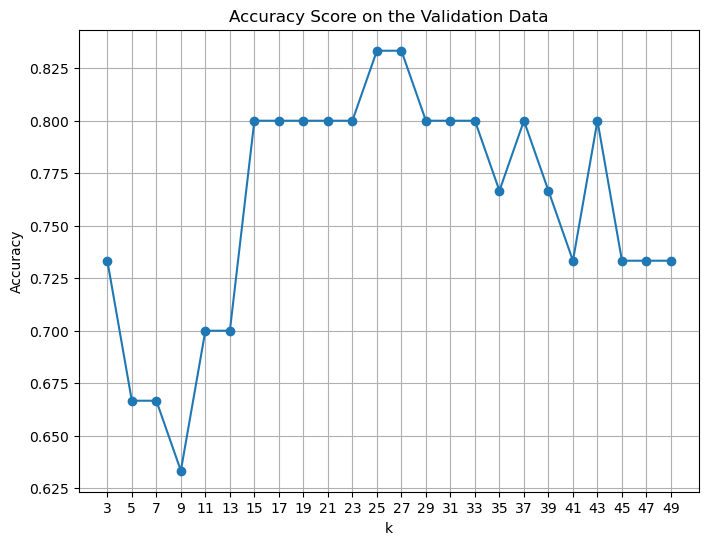

In [22]:
k_values = [k for k in range(3, 50, 2)]
accuracy_values = [accuracy(X_valid,
                            y_valid,
                            X_train,
                            y_train, k) for k in k_values]

plt.figure(figsize = (8, 6))

plt.plot(k_values, accuracy_values, marker = "o")
plt.title('Accuracy Score on the Validation Data')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid();

In [23]:
# We choose the optimal value for k from the above graph, 
# we fit the model again on the training data and 
# we report the error on the test data

accuracy(X_test, y_test, X_train, y_train, 25)

0.9

## 2) Use sklearn to implement K-NN 

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

X = df[["sepal_length", "sepal_width"]]
y = df["species"]

In [26]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)

In [27]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [28]:
y_pred = model.predict(X_valid)
y_pred

array(['virginica', 'versicolor', 'setosa', 'setosa', 'setosa',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'versicolor', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica'],
      dtype=object)

In [29]:
accuracy_score(y_valid, y_pred)

0.6333333333333333

In [30]:
cm = confusion_matrix(y_valid, y_pred)
cm

array([[8, 1, 0],
       [0, 8, 5],
       [0, 5, 3]])

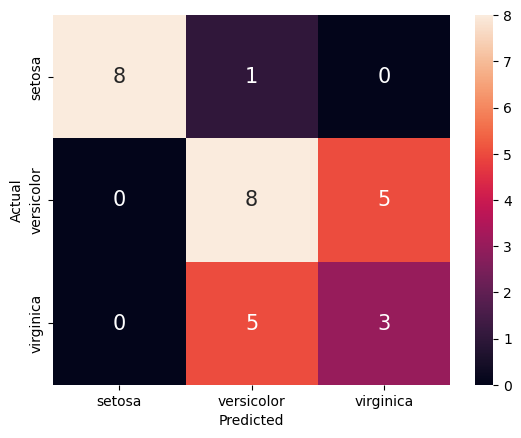

In [31]:
sns.heatmap(cm,
           annot=True,
           annot_kws={"size":15},
           xticklabels=['setosa', 'versicolor', 'virginica'],
           yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual');

In [32]:
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      0.89      0.94         9
  versicolor       0.57      0.62      0.59        13
   virginica       0.38      0.38      0.38         8

    accuracy                           0.63        30
   macro avg       0.65      0.63      0.64        30
weighted avg       0.65      0.63      0.64        30



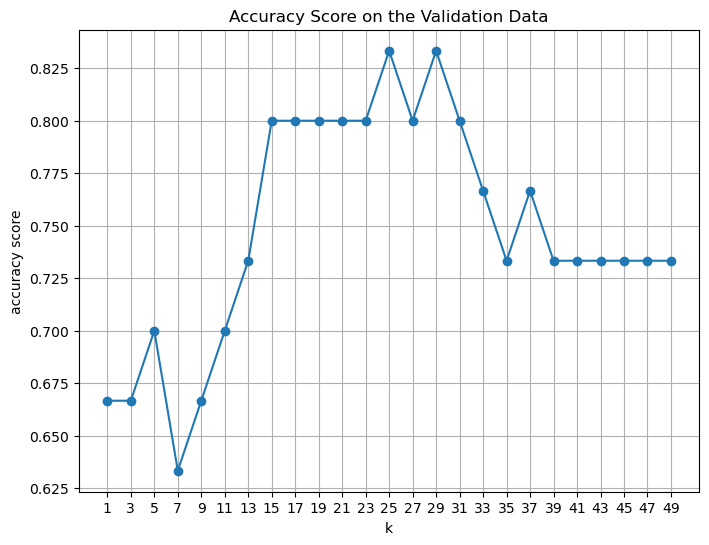

In [33]:
k_values = []
acc_score = []

for k in range(1, 50, 2):
    model = KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    acc_score.append(accuracy_score(y_valid, y_pred))
    k_values.append(k)


plt.figure(figsize = (8, 6))

plt.plot(k_values, acc_score, marker = "o")
plt.title("Accuracy Score on the Validation Data")
plt.xlabel("k")
plt.ylabel("accuracy score")
plt.xticks(k_values)
plt.grid();

In [34]:
m = max(acc_score)
m

0.8333333333333334

In [35]:
k_values[acc_score.index(m)]

25

In [36]:
model = KNeighborsClassifier(n_neighbors = 25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9

## 3) Use GridSearchCV and RandomizedSearchCV to select hyper-parameters

In [38]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

In [39]:
X = df[["sepal_length", "sepal_width"]]
y = df["species"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=10), 
                            X_train, 
                            y_train, 
                            cv=5, # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3),
                            scoring='accuracy')

cv_scores

array([0.66666667, 0.75      , 0.79166667, 0.70833333, 0.70833333])

[0.67 0.75 0.79 0.71 0.71]
Average accuracy: 0.725
Accuracy standard deviation: 0.042491829279939865


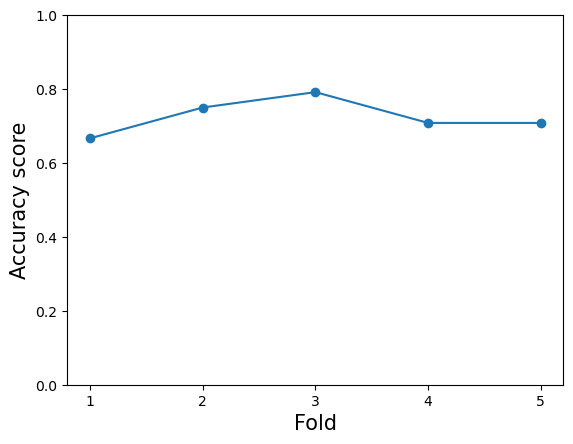

In [41]:
plt.plot(range(1, 6), cv_scores, marker='o')
plt.ylim(0, 1)
plt.ylabel('Accuracy score', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1,6))

print(np.round(cv_scores,2))
print('Average accuracy:', cv_scores.mean())
print('Accuracy standard deviation:', cv_scores.std());  

In [42]:
gs = GridSearchCV(estimator = KNeighborsClassifier(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5)

gs.fit(X_train, y_train)

gs.cv_results_

{'mean_fit_time': array([0.00069442, 0.00042205, 0.00041595, 0.00040584, 0.00039816,
        0.00040379, 0.00044875, 0.00040102, 0.00039439, 0.0003953 ,
        0.00039392, 0.00038877, 0.00038652, 0.00038462, 0.00038476,
        0.00037994, 0.0003819 , 0.0003881 , 0.0003922 , 0.00039945,
        0.000389  , 0.00038419, 0.00038466, 0.00038872, 0.000387  ,
        0.00038362, 0.00038457, 0.00039454, 0.0004312 , 0.0003943 ,
        0.00039134, 0.00038857, 0.00039301, 0.00038633, 0.00038881,
        0.00038953, 0.00038867, 0.00038629, 0.00038443, 0.00038147,
        0.00038152, 0.00037155, 0.00038338, 0.00038624, 0.00038338,
        0.00037775, 0.00038142, 0.00037766, 0.00037951, 0.00038247,
        0.00038052, 0.0003778 , 0.00038633, 0.00037694, 0.00038362,
        0.00039406, 0.00037723, 0.00037313, 0.00037923, 0.00036645,
        0.00036254, 0.00036178, 0.00037193, 0.00036178, 0.00037074,
        0.00037251, 0.00038815, 0.00037441, 0.00037088, 0.00037103,
        0.00037427, 0.00037479,

In [43]:
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000694,0.000144,0.001854,0.001062,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.708333,0.708333,0.708333,0.666667,0.625000,0.683333,0.033333,195
1,0.000422,0.000022,0.000603,0.000258,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.708333,0.708333,0.708333,0.666667,0.625000,0.683333,0.033333,195
2,0.000416,0.000018,0.000865,0.000042,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.708333,0.708333,0.708333,0.666667,0.625000,0.683333,0.033333,195
3,0.000406,0.000003,0.000475,0.000039,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.708333,0.708333,0.708333,0.666667,0.625000,0.683333,0.033333,195
4,0.000398,0.000004,0.000833,0.000024,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",0.833333,0.750000,0.708333,0.708333,0.708333,0.741667,0.048591,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000777,0.000320,0.002255,0.000298,49,2,distance,"{'n_neighbors': 49, 'p': 2, 'weights': 'distan...",0.708333,0.708333,0.875000,0.750000,0.750000,0.758333,0.061237,51
196,0.000409,0.000015,0.002031,0.000068,50,1,uniform,"{'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}",0.708333,0.583333,0.750000,0.708333,0.708333,0.691667,0.056519,193
197,0.000390,0.000016,0.001856,0.000067,50,1,distance,"{'n_neighbors': 50, 'p': 1, 'weights': 'distan...",0.708333,0.708333,0.875000,0.750000,0.750000,0.758333,0.061237,51
198,0.000393,0.000006,0.002063,0.000026,50,2,uniform,"{'n_neighbors': 50, 'p': 2, 'weights': 'uniform'}",0.666667,0.625000,0.791667,0.833333,0.708333,0.725000,0.077280,158


In [44]:
results[["param_n_neighbors", "param_weights", "param_p", "mean_test_score", "rank_test_score"]]

,param_n_neighbors,param_weights,param_p,mean_test_score,rank_test_score
0,1,uniform,1,0.683333,195
1,1,distance,1,0.683333,195
2,1,uniform,2,0.683333,195
3,1,distance,2,0.683333,195
4,2,uniform,1,0.741667,124
...,...,...,...,...,...
195,49,distance,2,0.758333,51
196,50,uniform,1,0.691667,193
197,50,distance,1,0.758333,51
198,50,uniform,2,0.725000,158


In [45]:
gs.best_score_

0.825

In [46]:
gs.best_params_

{'n_neighbors': 18, 'p': 1, 'weights': 'uniform'}

In [47]:
y_pred = gs.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

In [48]:
rs = RandomizedSearchCV(estimator = KNeighborsClassifier(),
                        param_distributions = {"n_neighbors": range(1,51),
                                               "weights": ['uniform', 'distance'],
                                               "p": [1,2]},
                        cv=5,
                        n_iter=10)

rs.fit(X_train, y_train)

rs.best_score_

0.7833333333333334

In [49]:
rs.best_params_

{'weights': 'uniform', 'p': 1, 'n_neighbors': 24}

In [50]:
y_pred = rs.predict(X_test)
accuracy_score(y_test, y_pred)

0.8333333333333334

##  4) Use sklearn to implement K-NN and mlxtend to plot the desicion boundary

In [52]:
#pip install mlxtend

In [53]:
from mlxtend.plotting import plot_decision_regions

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
k=50                # try k=50
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [57]:
y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9333333333333333

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'sepal width')

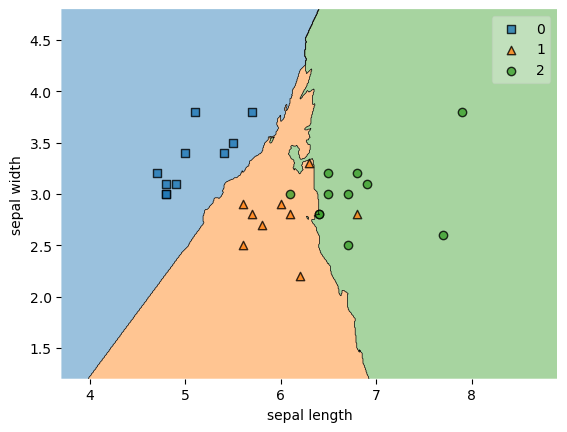

In [58]:
#plot_decision_regions(X_train.to_numpy(), y_train, clf = model)
plot_decision_regions(X_test.to_numpy(), y_test, clf = model) # change to test data
plt.xlabel('sepal length')
plt.ylabel('sepal width')
#plt.title(f"Decision Regions using {k}-NN and the Test Data");

## HomeWork 5:

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [61]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url) # dataset
df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"] # rename columns
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [62]:
df = df[[col for col in df.columns if col not in {'Sex'}]] # filter categorical out, we have dropped the 'sex' column as it is categorical.

X, y = df[[col for col in df.columns if col not in {'Rings'}]], df['Rings'] # split X,y as y with rings and x without rings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # split train/test data with 20% of data for testing

df # updated without 'sex' column


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


[-5.6  -4.28 -4.78 -4.38 -4.84]
Average Negative Error: -4.774556886227545
Negative Error Standard Deviation: 0.46540486595032704


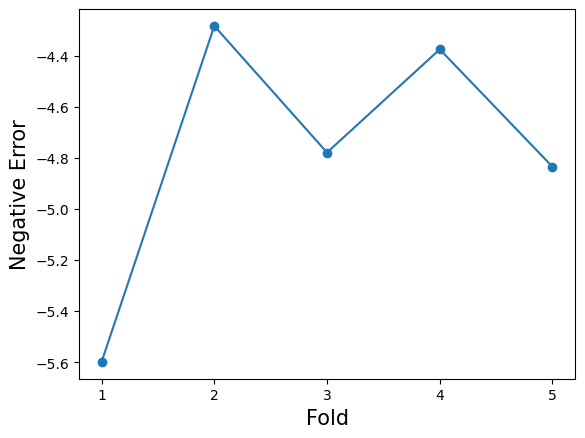

In [63]:
# plot cross validation scores
cv = 5
cv_scores = cross_val_score(KNeighborsRegressor(n_neighbors=10), 
                            X_train, 
                            y_train, 
                            cv=cv, # no shuffle, KFold for regressors, default value 5
                            #cv=KFold(n_splits=cv, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=cv, shuffle=True),
                            #cv=RepeatedKFold(n_splits=cv, n_repeats=3),
                            scoring='neg_mean_squared_error') # -MSE for scoring

plt.plot(range(1, cv+1), cv_scores, marker='o')
plt.ylabel('Negative Error', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1, cv+1))

print(np.round(cv_scores,2))
print('Average Negative Error:', cv_scores.mean())
print('Negative Error Standard Deviation:', cv_scores.std());  

In [64]:
# search optimal hyperparameters
gs = GridSearchCV(estimator=KNeighborsRegressor(),
    param_grid = {
        "n_neighbors": range(1, 101),
        "weights": ['uniform', 'distance'],
        "p": [1, 2, np.inf]
    }, scoring='neg_mean_squared_error', cv=KFold(n_splits=5))

gs.fit(X_train, y_train)

gs.cv_results_

{'mean_fit_time': array([0.00124655, 0.00082994, 0.00075808, 0.00086455, 0.00074615,
        0.00069199, 0.00071993, 0.00070429, 0.00071979, 0.00071917,
        0.00069098, 0.00072155, 0.0007544 , 0.00071483, 0.00070219,
        0.00068965, 0.00070977, 0.00067978, 0.00066171, 0.00069456,
        0.00068154, 0.00069485, 0.00068312, 0.00069828, 0.00069356,
        0.00069933, 0.00071211, 0.00066948, 0.00064979, 0.00065317,
        0.00069647, 0.00067768, 0.00068798, 0.00070596, 0.00067577,
        0.00066843, 0.00071087, 0.00068922, 0.00067334, 0.00070214,
        0.00068321, 0.00066576, 0.00069017, 0.00070701, 0.00070434,
        0.00071287, 0.00068254, 0.00065761, 0.00068455, 0.00072541,
        0.00070243, 0.00070276, 0.0007483 , 0.00069103, 0.00071502,
        0.00070729, 0.00071645, 0.00070405, 0.00071454, 0.0006834 ,
        0.00072379, 0.00073981, 0.00071421, 0.00068555, 0.00068207,
        0.00069833, 0.0007113 , 0.00072155, 0.00074978, 0.00071321,
        0.00068502, 0.00067201,

In [65]:
# gather results
results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001247,0.000521,0.002626,0.000756,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",-9.910180,-7.910180,-8.465569,-7.796407,-7.606287,-8.337725,0.836634,597
1,0.000830,0.000093,0.002155,0.000036,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",-9.910180,-7.910180,-8.465569,-7.796407,-7.606287,-8.337725,0.836634,597
2,0.000758,0.000018,0.001578,0.000061,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",-8.673653,-8.104790,-8.672156,-7.811377,-8.248503,-8.302096,0.333948,595
3,0.000865,0.000047,0.001585,0.000055,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",-8.673653,-8.104790,-8.672156,-7.811377,-8.248503,-8.302096,0.333948,595
4,0.000746,0.000040,0.001127,0.000070,1,inf,uniform,"{'n_neighbors': 1, 'p': inf, 'weights': 'unifo...",-8.742515,-8.642216,-9.546407,-8.350299,-8.154192,-8.687126,0.477686,599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.000701,0.000009,0.007940,0.000277,100,1,distance,"{'n_neighbors': 100, 'p': 1, 'weights': 'dista...",-5.813414,-4.751709,-5.170725,-4.638743,-4.920214,-5.058961,0.417595,495
596,0.000716,0.000024,0.007008,0.000336,100,2,uniform,"{'n_neighbors': 100, 'p': 2, 'weights': 'unifo...",-5.872463,-4.907372,-5.296707,-4.719180,-4.998040,-5.158752,0.402656,551
597,0.000812,0.000020,0.007435,0.000259,100,2,distance,"{'n_neighbors': 100, 'p': 2, 'weights': 'dista...",-5.760713,-4.749298,-5.138376,-4.582609,-4.881425,-5.022484,0.411444,461
598,0.000799,0.000012,0.006556,0.000274,100,inf,uniform,"{'n_neighbors': 100, 'p': inf, 'weights': 'uni...",-5.915267,-5.000650,-5.415153,-4.820585,-5.104102,-5.251151,0.384111,576


In [66]:
# sort models in order
results.sort_values('rank_test_score')[["param_n_neighbors", "param_weights", "param_p", "mean_test_score","rank_test_score"]]



,param_n_neighbors,param_weights,param_p,mean_test_score,rank_test_score
105,18,distance,2,-4.652526,1
133,23,distance,1,-4.652709,2
145,25,distance,1,-4.655147,3
99,17,distance,2,-4.655859,4
93,16,distance,2,-4.657675,5
...,...,...,...,...,...
3,1,distance,2,-8.302096,595
1,1,distance,1,-8.337725,597
0,1,uniform,1,-8.337725,597
4,1,uniform,inf,-8.687126,599


In [67]:
# report optimal values and model performance
print(gs.best_params_) # We got the best model with better hyperparameters with less error that tends to better performance.
pd.DataFrame(
    [
    mean_squared_error(y_test, gs.predict(X_test)),
    mean_absolute_error(y_test, gs.predict(X_test)),
    root_mean_squared_error(y_test, gs.predict(X_test))
    ], 
    index=['Mean_Squared_Error', 'Mean_Absolute_Error', 'Root_Mean_Squared_Error'], columns=[f'Test Error'])

{'n_neighbors': 18, 'p': 2, 'weights': 'distance'}


,Test Error
Mean_Squared_Error,4.820532
Mean_Absolute_Error,1.523569
Root_Mean_Squared_Error,2.195571


## Conclusion:

### We got the best parameters and we noticed that "k=18" gives us the optimal solution with "p=2" indicating Euclidean distance along with "weights are taken with respect to distance". we calculated errors (MSE, MAE, RMSE) for that optimal model.